## **Key Feature** ##

CustomerID: Unique identifier for each customer.

Age: Age of the customer, reflecting their demographic profile.

Gender: Gender of the customer (Male or Female).

Tenure: Duration (in months) the customer has been with the service provider.

MonthlyCharges: The monthly fee charged to the customer.

ContractType: Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).

InternetService: Type of internet service subscribed to (DSL, Fiber Optic, None).

TechSupport: Whether the customer has tech support (Yes or No).

TotalCharges: Total amount charged to the customer (calculated as MonthlyCharges * Tenure).

Churn: Target variable indicating whether the customer has churned (Yes or No).

## **Importing Libraries** ##

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## **Loading Data** ##

In [2]:
df = pd.read_csv(r'D:\CustomerChurnAnalysis\customer_churn_data.csv')

## **Reading First five row data** ##

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


## **Cleaning data by handling missing values, removing duplicates** ##

In [37]:
# Clean data
df.dropna(inplace=True)
df.shape

(1000, 10)

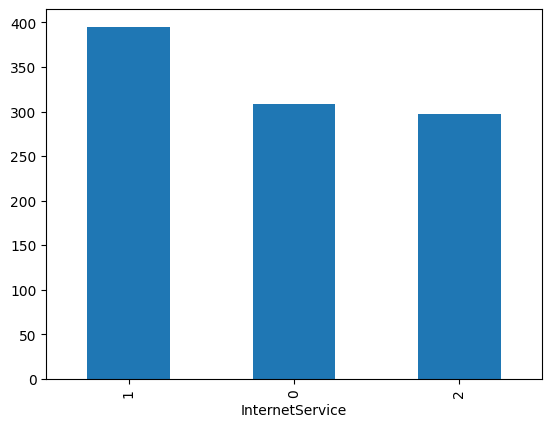

In [43]:
# Analyze data
df['InternetService'].value_counts().plot(kind='bar')
plt.show()

## **Encoding categorical variables and transforming each column** ##

In [35]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["ContractType"] = LabelEncoder().fit_transform(df["ContractType"])
df["InternetService"] = LabelEncoder().fit_transform(df["InternetService"])
df["TechSupport"] = LabelEncoder().fit_transform(df["TechSupport"])
df["Churn"] = LabelEncoder().fit_transform(df["Churn"])
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,0,1,353.40,1,1
1,2,43,1,0,36.67,0,1,0.00,1,1
2,3,51,0,2,63.79,0,1,127.58,0,1
3,4,60,0,8,102.34,1,0,818.72,1,1
4,5,42,1,32,69.01,0,2,2208.32,0,1
...,...,...,...,...,...,...,...,...,...,...
995,996,42,1,41,37.14,0,1,1522.74,1,1
996,997,62,1,9,80.93,0,2,728.37,0,1
997,998,51,0,15,111.72,0,1,1675.80,1,1
998,999,39,1,68,65.67,1,2,4465.56,0,1


## **Dataframe overview, datatype,Non-null counts For data understanding** ##

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   int32  
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   int32  
 6   InternetService  1000 non-null   int32  
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   int32  
 9   Churn            1000 non-null   int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 58.7 KB


## **Data Type** ##

In [16]:
df.dtypes

CustomerID           int64
Age                  int64
Gender               int32
Tenure               int64
MonthlyCharges     float64
ContractType         int32
InternetService      int32
TotalCharges       float64
TechSupport          int32
Churn                int32
dtype: object

## **Missing Value count** ##

In [13]:
df.isna().sum() 

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

## **count of column internet service** ##

In [17]:
print(df["InternetService"].value_counts())

InternetService
1    395
0    308
2    297
Name: count, dtype: int64


## **Indentifying Relationship and visualizing patterns** ##

<Axes: >

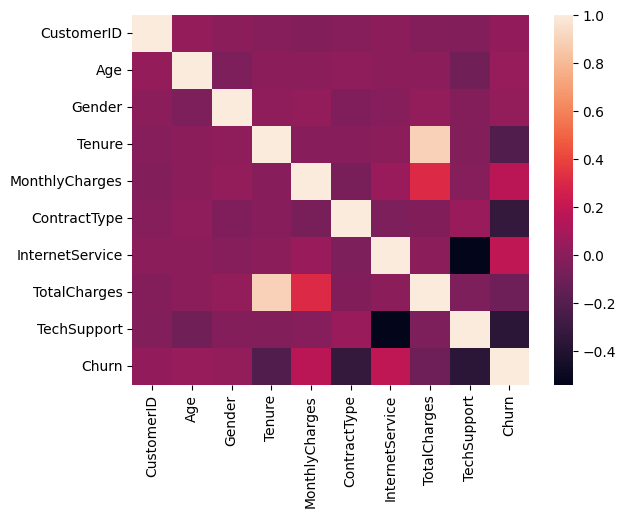

In [18]:
import seaborn as sns
sns.heatmap(df.corr())

In [19]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [20]:
X

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,1,49,1,4,88.35,0,1,353.40,1
1,2,43,1,0,36.67,0,1,0.00,1
2,3,51,0,2,63.79,0,1,127.58,0
3,4,60,0,8,102.34,1,0,818.72,1
4,5,42,1,32,69.01,0,2,2208.32,0
...,...,...,...,...,...,...,...,...,...
995,996,42,1,41,37.14,0,1,1522.74,1
996,997,62,1,9,80.93,0,2,728.37,0
997,998,51,0,15,111.72,0,1,1675.80,1
998,999,39,1,68,65.67,1,2,4465.56,0


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int32

## **splitting data into train and test** ##

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
X_train.shape, y_train.shape

((700, 9), (700,))

In [24]:
X_test.shape, y_test.shape

((300, 9), (300,))

In [25]:
modeloLR = LogisticRegression()
modeloRF = RandomForestClassifier()

## **Using Linear regression predictive model and printing it's accuracy** ##

In [26]:
modeloLR.fit(X_train, y_train)

c:\Users\gzar9\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Using Random forest model and printing it's accuracy** ##

In [27]:
modeloRF.fit(X_test, y_test)

RandomForestClassifier()

In [28]:
y_predLR = modeloLR.predict(X_test)

In [29]:
y_predRF = modeloRF.predict(X_test)

In [30]:
print("The Quality of the LR model: ", accuracy_score(y_test, y_predLR) * 100, "%")

The Quality of the LR model:  91.0 %


In [31]:
print("The Quality of RF model: ", accuracy_score(y_test, y_predRF) * 100, "%")

The Quality of RF model:  100.0 %


## **COnfusion matrix of LR model** ##

<Axes: >

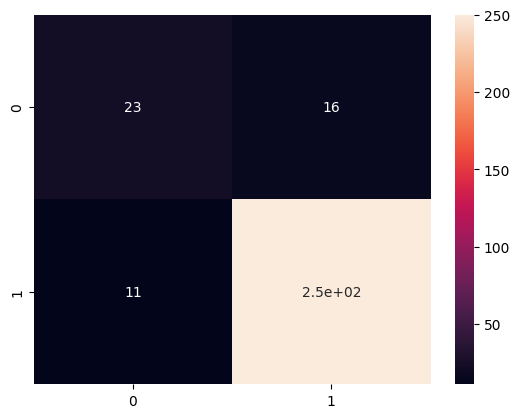

In [46]:
sns.heatmap(confusion_matrix(y_test, y_predLR), annot = True)

## **Confusion matrix of RF model** ##

<Axes: >

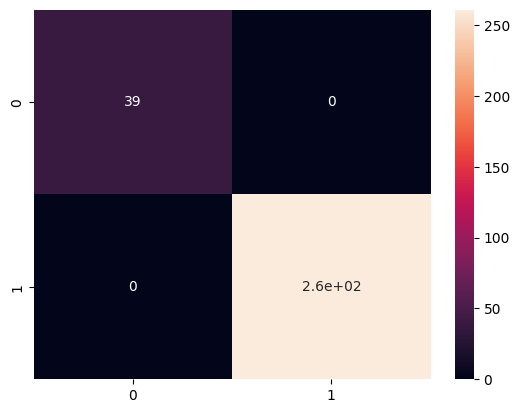

In [32]:
sns.heatmap(confusion_matrix(y_test, y_predRF), annot = True)